<a href="https://colab.research.google.com/github/Danangellotti/Ciencia_de_Datos_UGR_24/blob/main/FAO_TOTAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importar bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
# Descargar y descomprimir el dataset
!mkdir -p ./trabajo
!wget -O ./trabajo/fao.zip "https://bulks-faostat.fao.org/production/Emisiones_Totales_S_Todos_los_Datos_(Normalizado).zip"
!unzip ./trabajo/fao.zip -d ./trabajo/

--2024-12-04 14:03:25--  https://bulks-faostat.fao.org/production/Emisiones_Totales_S_Todos_los_Datos_(Normalizado).zip
Resolving bulks-faostat.fao.org (bulks-faostat.fao.org)... 13.226.225.57, 13.226.225.12, 13.226.225.119, ...
Connecting to bulks-faostat.fao.org (bulks-faostat.fao.org)|13.226.225.57|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20526629 (20M) [application/zip]
Saving to: ‘./trabajo/fao.zip’

./trabajo/fao.zip   100%[===================>]  19.58M  41.8MB/s    in 0.5s    

2024-12-04 14:03:26 (41.8 MB/s) - ‘./trabajo/fao.zip’ saved [20526629/20526629]

Archive:  ./trabajo/fao.zip
 extracting: ./trabajo/Emisiones_Totales_S_Códigodelproductos.csv  
  inflating: ./trabajo/Emisiones_Totales_S_Códigodeláreas.csv  
  inflating: ./trabajo/Emisiones_Totales_S_Elementos.csv  
 extracting: ./trabajo/Emisiones_Totales_S_Fuentes.csv  
 extracting: ./trabajo/Emisiones_Totales_S_Símbolos.csv  
  inflating: ./trabajo/Emisiones_Totales_S_Todos_los_Datos_(No

In [3]:
# Cargar el dataset
data_path = './trabajo/Emisiones_Totales_S_Todos_los_Datos_(Normalizado).csv'
dataset_general = pd.read_csv(data_path)
dataset_general.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2397460 entries, 0 to 2397459
Data columns (total 15 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Código del área        int64  
 1   Código del área (M49)  object 
 2   Área                   object 
 3   Código del producto    int64  
 4   Producto               object 
 5   Código del elemento    int64  
 6   Elemento               object 
 7   Código del año         int64  
 8   Año                    int64  
 9   Código fuente          int64  
 10  Fuente                 object 
 11  Unidad                 object 
 12  Valor                  float64
 13  Símbolo                object 
 14  Nota                   float64
dtypes: float64(2), int64(6), object(7)
memory usage: 274.4+ MB


In [4]:
# Vista del dataset general
dataset_general

,Código del área,Código del área (M49),Área,Código del producto,Producto,Código del elemento,Elemento,Código del año,Año,Código fuente,Fuente,Unidad,Valor,Símbolo,Nota
0,2,'004,Afganistán,5064,Residuos agrícolas,7234,Emisiones directas (N2O),1961,1961,3050,FAO TIER 1,kilotones,8.762000e-01,E,NaN
1,2,'004,Afganistán,5064,Residuos agrícolas,7234,Emisiones directas (N2O),1962,1962,3050,FAO TIER 1,kilotones,8.829000e-01,E,NaN
2,2,'004,Afganistán,5064,Residuos agrícolas,7234,Emisiones directas (N2O),1963,1963,3050,FAO TIER 1,kilotones,8.236000e-01,E,NaN
3,2,'004,Afganistán,5064,Residuos agrícolas,7234,Emisiones directas (N2O),1964,1964,3050,FAO TIER 1,kilotones,8.882000e-01,E,NaN
4,2,'004,Afganistán,5064,Residuos agrícolas,7234,Emisiones directas (N2O),1965,1965,3050,FAO TIER 1,kilotones,8.978000e-01,E,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2397455,5873,'198,OECD,6829,Emisiones totales excluyendo LULUCF,723113,Emisiones (CO2eq) (AR5),2018,2018,3050,FAO TIER 1,kilotones,1.555672e+07,E,NaN
2397456,5873,'198,OECD,6829,Emisiones totales excluyendo LULUCF,723113,Emisiones (CO2eq) (AR5),2019,2019,3050,FAO TIER 1,kilotones,1.524222e+07,E,NaN
2397457,5873,'198,OECD,6829,Emisiones totales excluyendo LULUCF,723113,Emisiones (CO2eq) (AR5),2020,2020,3050,FAO TIER 1,kilotones,1.411602e+07,E,NaN
2397458,5873,'198,OECD,6829,Emisiones totales excluyendo LULUCF,723113,Emisiones (CO2eq) (AR5),2021,2021,3050,FAO TIER 1,kilotones,1.476306e+07,E,NaN


In [5]:
# Verificamos si los países de nuestro interes se encuentra en el ds y como figuran para filtrarlos
dataset_general['Área'].unique()

array(['Afganistán', 'Albania', 'Alemania', 'Andorra', 'Angola',
       'Anguila', 'Antigua y Barbuda', 'Antillas Neerlandesas (ex)',
       'Arabia Saudita', 'Argelia', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaiyán', 'Bahamas', 'Bahrein',
       'Bangladesh', 'Barbados', 'Belarús', 'Bélgica',
       'Bélgica-Luxemburgo', 'Belice', 'Benin', 'Bermudas', 'Bhután',
       'Bolivia (Estado Plurinacional de)', 'Bosnia y Herzegovina',
       'Botswana', 'Brasil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Camboya', 'Camerún',
       'Canadá', 'Chad', 'Checoslovaq', 'Chequia', 'Chile', 'China',
       'China, Continental', 'China, RAE de Hong Kong',
       'China, RAE de Macao', 'China, Taiwán provincia de', 'Chipre',
       'Colombia', 'Comoras', 'Congo', 'Costa Rica', "Côte d'Ivoire",
       'Croacia', 'Cuba', 'Dinamarca', 'Djibouti', 'Dominica', 'Ecuador',
       'Egipto', 'El Salvador', 'Emiratos Árabes Unidos', 'Eritrea

In [6]:
# Creamos los dataset de los paises pertenecientes al Mercosur (Argentina, Brasil, Paraguay y Uruguay)
ds_argentina = dataset_general[dataset_general['Área'] == 'Argentina']
ds_brasil = dataset_general[dataset_general['Área'] == 'Brasil']
ds_paraguay = dataset_general[dataset_general['Área'] == 'Paraguay']
ds_uruguay = dataset_general[dataset_general['Área'] == 'Uruguay']
ds_EstadosUnidos = dataset_general[dataset_general['Área'] == 'Estados Unidos de América']
ds_Canada = dataset_general[dataset_general['Área'] == 'Canadá']
ds_Mexico = dataset_general[dataset_general['Área'] == 'México']

In [7]:
# Filtramos solo las columnas de nuestro interes
ds_argentina = ds_argentina[['Área', 'Producto', 'Elemento', 'Año', 'Valor', 'Unidad']]
ds_brasil = ds_brasil[['Área', 'Producto', 'Elemento', 'Año', 'Valor', 'Unidad']]
ds_paraguay = ds_paraguay[['Área', 'Producto', 'Elemento', 'Año', 'Valor', 'Unidad']]
ds_uruguay = ds_uruguay[['Área', 'Producto', 'Elemento', 'Año', 'Valor', 'Unidad']]
ds_EstadosUnidos = ds_EstadosUnidos[['Área', 'Producto', 'Elemento', 'Año', 'Valor', 'Unidad']]
ds_Canada = ds_Canada[['Área', 'Producto', 'Elemento', 'Año', 'Valor', 'Unidad']]
ds_Mexico = ds_Mexico[['Área', 'Producto', 'Elemento', 'Año', 'Valor', 'Unidad']]

In [8]:
# Determinamos el rango de años que vamos a utilizar para nuestro analisis
ds_argentina = ds_argentina[(ds_argentina['Año'] >= 1990) & (ds_argentina['Año'] <= 2022)]
ds_brasil = ds_brasil[(ds_brasil['Año'] >= 1990) & (ds_brasil['Año'] <= 2022)]
ds_paraguay = ds_paraguay[(ds_paraguay['Año'] >= 1990) & (ds_paraguay['Año'] <= 2022)]
ds_uruguay = ds_uruguay[(ds_uruguay['Año'] >= 1990) & (ds_uruguay['Año'] <= 2022)]
ds_EstadosUnidos = ds_EstadosUnidos[(ds_EstadosUnidos['Año'] >= 1990) & (ds_EstadosUnidos['Año'] <= 2022)]
ds_Canada = ds_Canada[(ds_Canada['Año'] >= 1990) & (ds_Canada['Año'] <= 2022)]
ds_Mexico = ds_Mexico[(ds_Mexico['Año'] >= 1990) & (ds_Mexico['Año'] <= 2022)]

In [9]:
# Verificamos si en los dataset hay valores nulos
print(ds_argentina.isnull().sum())
print(ds_brasil.isnull().sum())
print(ds_paraguay.isnull().sum())
print(ds_uruguay.isnull().sum())
print(ds_EstadosUnidos.isnull().sum())
print(ds_Canada.isnull().sum())
print(ds_Mexico.isnull().sum())

Área        0
Producto    0
Elemento    0
Año         0
Valor       0
Unidad      0
dtype: int64
Área        0
Producto    0
Elemento    0
Año         0
Valor       0
Unidad      0
dtype: int64
Área        0
Producto    0
Elemento    0
Año         0
Valor       0
Unidad      0
dtype: int64
Área        0
Producto    0
Elemento    0
Año         0
Valor       0
Unidad      0
dtype: int64
Área        0
Producto    0
Elemento    0
Año         0
Valor       0
Unidad      0
dtype: int64
Área        0
Producto    0
Elemento    0
Año         0
Valor       0
Unidad      0
dtype: int64
Área        0
Producto    0
Elemento    0
Año         0
Valor       0
Unidad      0
dtype: int64


In [10]:
# Quitamos los valores duplicados del dataset "ds_argentina_filtrada" si es que los hay.
# Omitimos la limpieza de los valores nulos ya que no se detecto nulos en las columnos de nuestro interes
ds_argentina = ds_argentina.drop_duplicates()
ds_brasil = ds_brasil.drop_duplicates()
ds_paraguay = ds_paraguay.drop_duplicates()
ds_uruguay = ds_uruguay.drop_duplicates()
ds_mercosur = pd.concat([ds_argentina, ds_brasil, ds_paraguay, ds_uruguay])
ds_EstadosUnidos = ds_EstadosUnidos.drop_duplicates()
ds_Canada = ds_Canada.drop_duplicates()
ds_Mexico = ds_Mexico.drop_duplicates()
ds_t_mec = pd.concat([ds_EstadosUnidos, ds_Canada, ds_Mexico])

In [11]:
# Agrupamos la cantidad de GEI por año
ds_argentina_GEI = ds_argentina.groupby('Año')['Valor'].sum().reset_index()
ds_brasil_GEI = ds_brasil.groupby('Año')['Valor'].sum().reset_index()
ds_paraguay_GEI = ds_paraguay.groupby('Año')['Valor'].sum().reset_index()
ds_uruguay_GEI = ds_uruguay.groupby('Año')['Valor'].sum().reset_index()
ds_mercosur_GEI = ds_mercosur.groupby('Año')['Valor'].sum().reset_index()
ds_EstadosUnidos_GEI = ds_EstadosUnidos.groupby('Año')['Valor'].sum().reset_index()
ds_Canada_GEI = ds_Canada.groupby('Año')['Valor'].sum().reset_index()
ds_Mexico_GEI = ds_Mexico.groupby('Año')['Valor'].sum().reset_index()
ds_t_mec_GEI = ds_t_mec.groupby('Año')['Valor'].sum().reset_index()

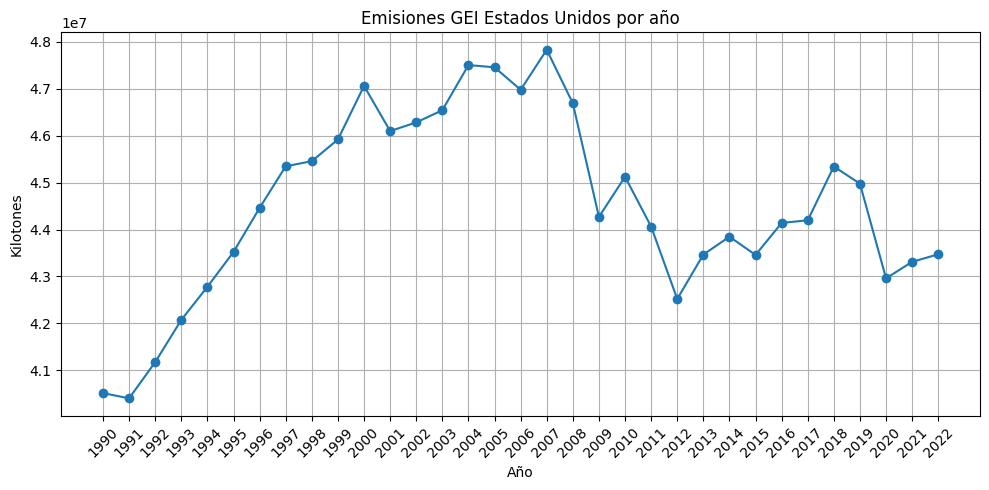

In [12]:
# Graficamos las emisiones de GEI de Estados Unidos por año
plt.figure(figsize=(10, 5))
plt.plot(ds_EstadosUnidos_GEI["Año"], ds_EstadosUnidos_GEI["Valor"], marker='o')
plt.title("Emisiones GEI Estados Unidos por año")
plt.xlabel("Año")
plt.ylabel("Kilotones")
plt.grid()
plt.xticks(ds_EstadosUnidos_GEI["Año"], rotation=45)
plt.tight_layout()
plt.show()

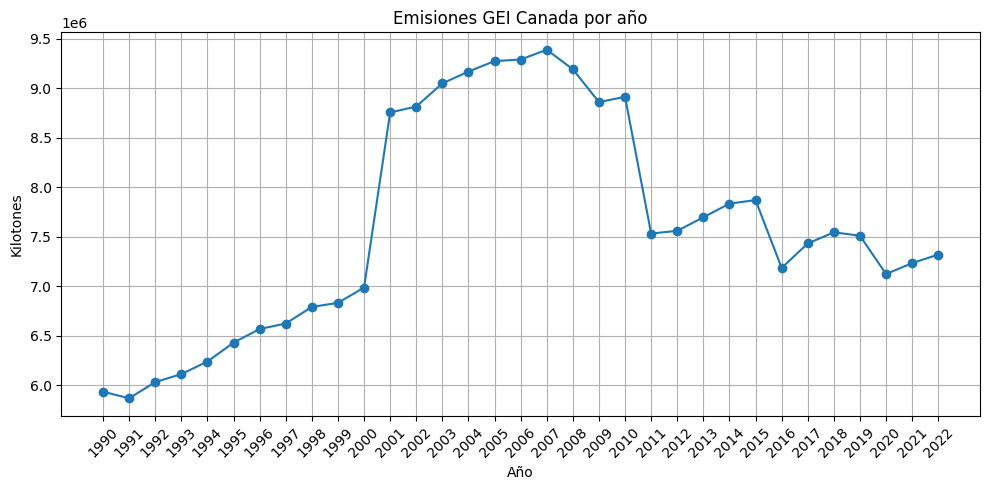

In [13]:
# Graficamos las emisiones de GEI de Canada por año
plt.figure(figsize=(10, 5))
plt.plot(ds_Canada_GEI["Año"], ds_Canada_GEI["Valor"], marker='o')
plt.title("Emisiones GEI Canada por año")
plt.xlabel("Año")
plt.ylabel("Kilotones")
plt.grid()
plt.xticks(ds_Canada_GEI["Año"], rotation=45)
plt.tight_layout()
plt.show()

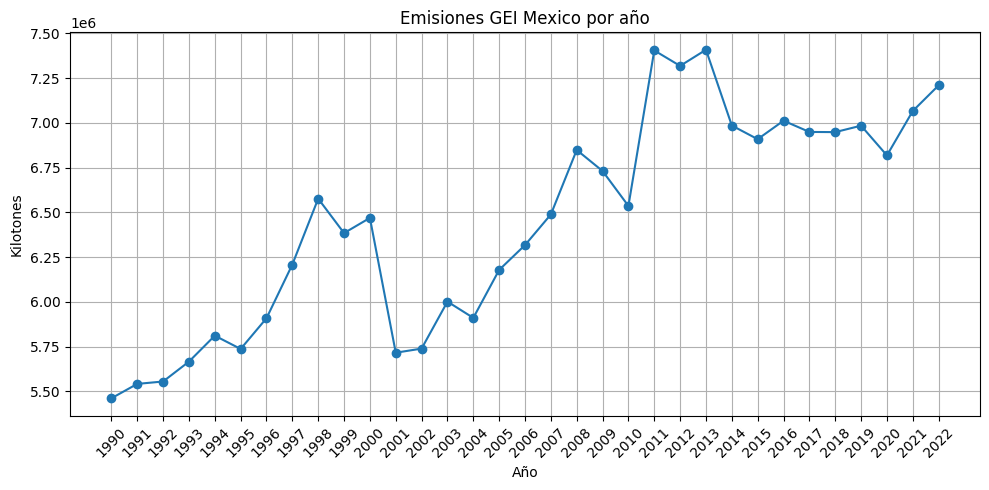

In [14]:
# Graficamos las emisiones de GEI de Mexico por año
plt.figure(figsize=(10, 5))
plt.plot(ds_Mexico_GEI["Año"], ds_Mexico_GEI["Valor"], marker='o')
plt.title("Emisiones GEI Mexico por año")
plt.xlabel("Año")
plt.ylabel("Kilotones")
plt.grid()
plt.xticks(ds_Mexico_GEI["Año"], rotation=45)
plt.tight_layout()
plt.show()

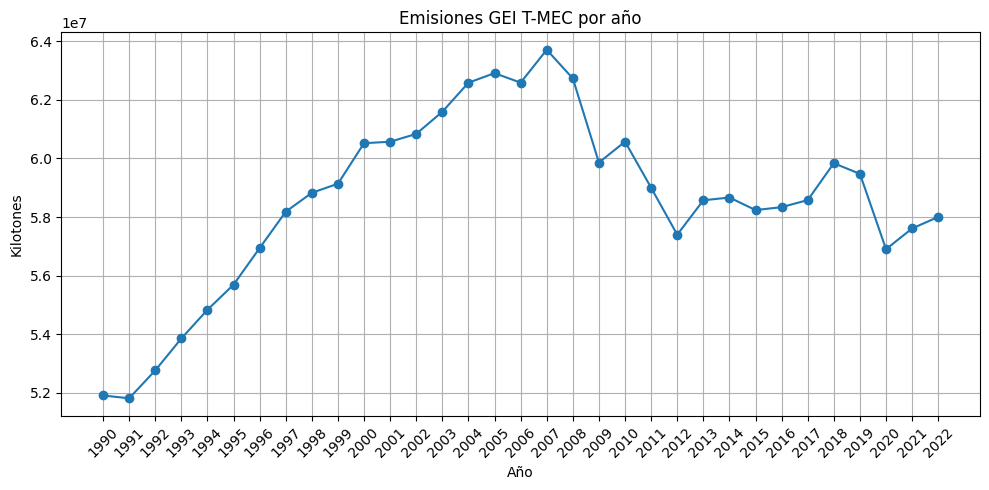

In [15]:
# Graficamos las emisiones de GEI del T-MEC por año
plt.figure(figsize=(10, 5))
plt.plot(ds_t_mec_GEI["Año"], ds_t_mec_GEI["Valor"], marker='o')
plt.title("Emisiones GEI T-MEC por año")
plt.xlabel("Año")
plt.ylabel("Kilotones")
plt.grid()
plt.xticks(ds_t_mec_GEI["Año"], rotation=45)
plt.tight_layout()
plt.show()

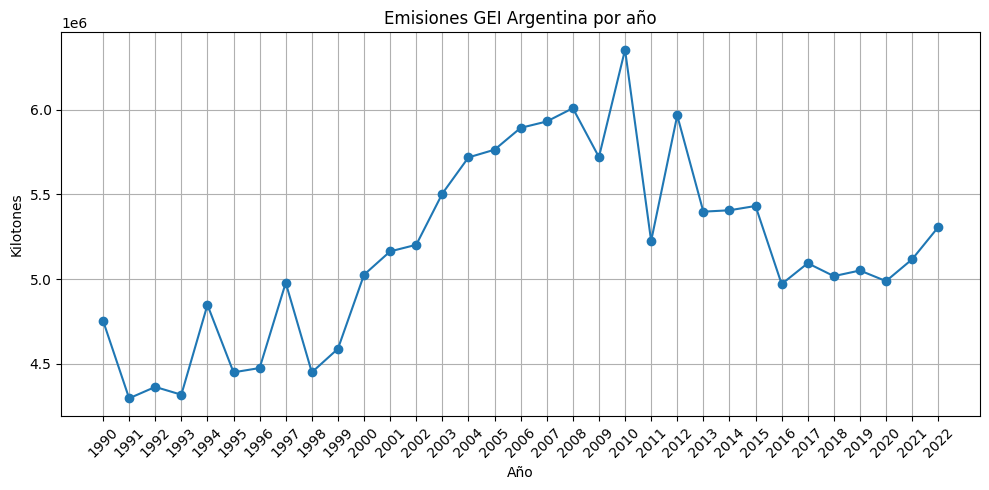

In [16]:
# Graficamos las emisiones de GEI de Argentina por año
plt.figure(figsize=(10, 5))
plt.plot(ds_argentina_GEI["Año"], ds_argentina_GEI["Valor"], marker='o')
plt.title("Emisiones GEI Argentina por año")
plt.xlabel("Año")
plt.ylabel("Kilotones")
plt.grid()
plt.xticks(ds_argentina_GEI["Año"], rotation=45)
plt.tight_layout()
plt.show()

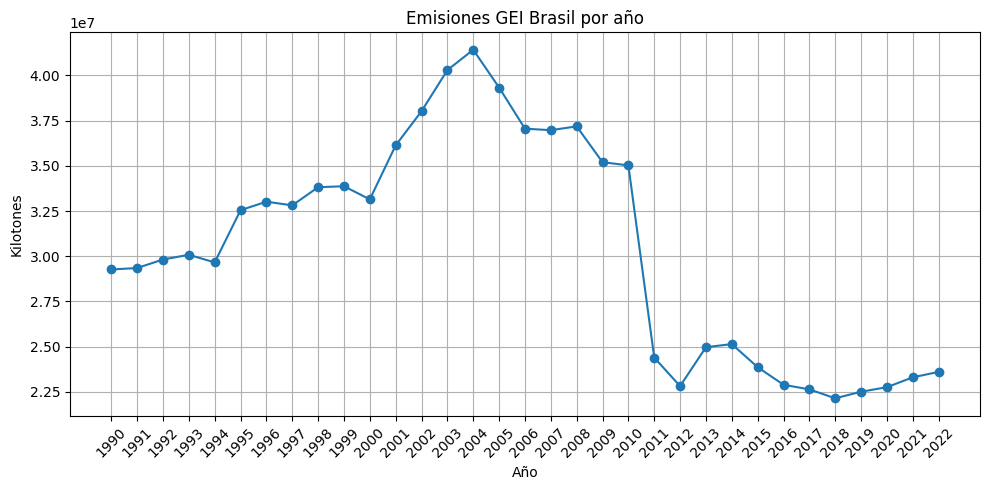

In [17]:
# Graficamos las emisiones de GEI de Brasil por año
plt.figure(figsize=(10, 5))
plt.plot(ds_brasil_GEI["Año"], ds_brasil_GEI["Valor"], marker='o')
plt.title("Emisiones GEI Brasil por año")
plt.xlabel("Año")
plt.ylabel("Kilotones")
plt.grid()
plt.xticks(ds_brasil_GEI["Año"], rotation=45)
plt.tight_layout()
plt.show()

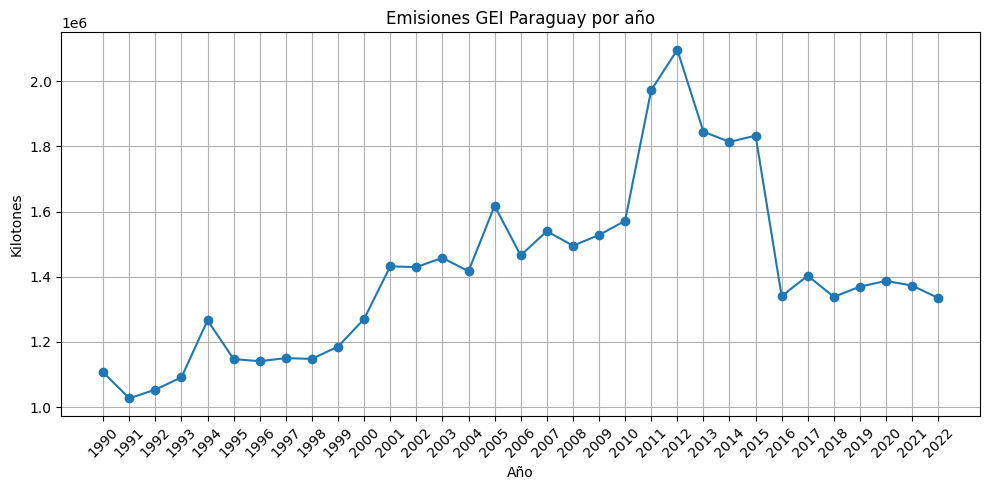

In [18]:
# Graficamos las emisiones de GEI de Paraguay por año
plt.figure(figsize=(10, 5))
plt.plot(ds_paraguay_GEI["Año"], ds_paraguay_GEI["Valor"], marker='o')
plt.title("Emisiones GEI Paraguay por año")
plt.xlabel("Año")
plt.ylabel("Kilotones")
plt.grid()
plt.xticks(ds_paraguay_GEI["Año"], rotation=45)
plt.tight_layout()
plt.show()

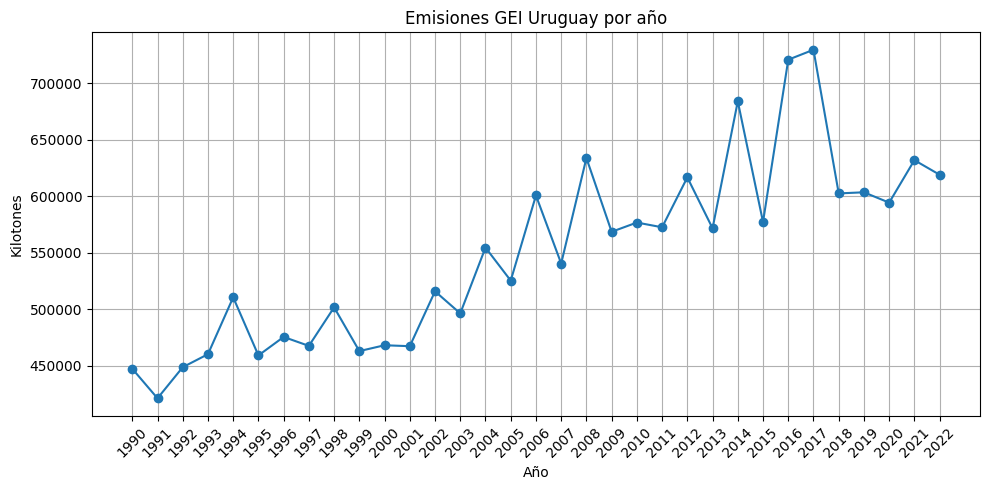

In [19]:
# Graficamos las emisiones de GEI de Uruguay por año
plt.figure(figsize=(10, 5))
plt.plot(ds_uruguay_GEI["Año"], ds_uruguay_GEI["Valor"], marker='o')
plt.title("Emisiones GEI Uruguay por año")
plt.xlabel("Año")
plt.ylabel("Kilotones")
plt.grid()
plt.xticks(ds_uruguay_GEI["Año"], rotation=45)
plt.tight_layout()
plt.show()

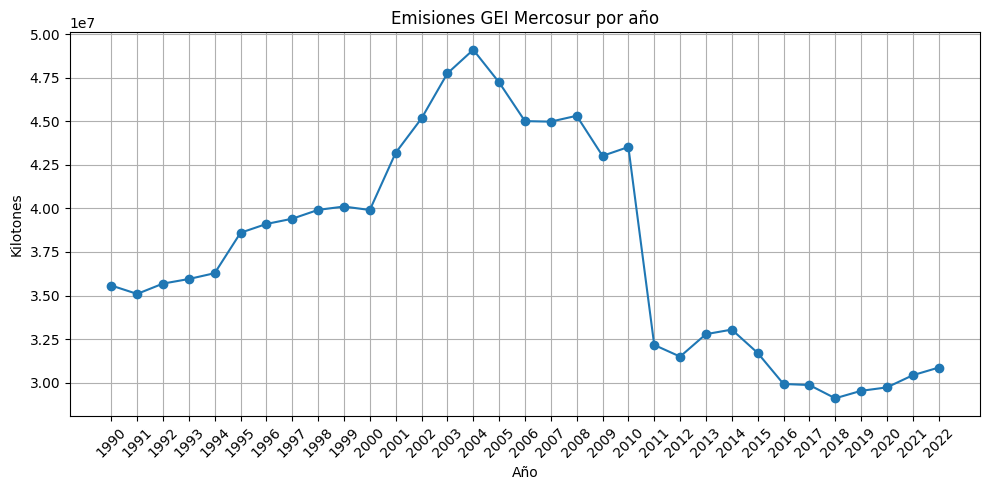

In [20]:
# Graficamos las emisiones de GEI del Mercosur por año
plt.figure(figsize=(10, 5))
plt.plot(ds_mercosur_GEI["Año"], ds_mercosur_GEI["Valor"], marker='o')
plt.title("Emisiones GEI Mercosur por año")
plt.xlabel("Año")
plt.ylabel("Kilotones")
plt.grid()
plt.xticks(ds_mercosur_GEI["Año"], rotation=45)
plt.tight_layout()
plt.show()

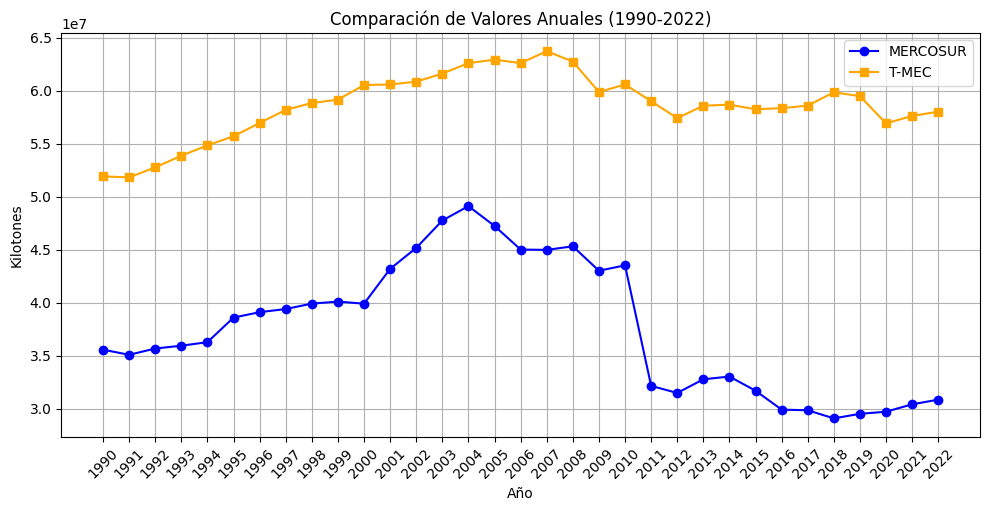

In [21]:
# Graficamos en el mismo grafico los dataser "ds_mercosur_GEI" y "ds_t_mec_GEI"
plt.figure(figsize=(10, 5))
plt.plot(ds_mercosur_GEI["Año"], ds_mercosur_GEI["Valor"], marker='o', label='MERCOSUR', color='blue')
plt.plot(ds_t_mec_GEI["Año"], ds_t_mec_GEI["Valor"], marker='s', label='T-MEC', color='orange')
plt.title("Comparación de Valores Anuales (1990-2022)")
plt.xlabel("Año")
plt.ylabel("Kilotones")
plt.grid()
plt.legend()
plt.tight_layout()
plt.xticks(ds_mercosur_GEI["Año"],rotation=45)
plt.show()

In [23]:
# Modelado predictivo: Regresión lineal para MERCOSUR
model = LinearRegression()
X_mercosur = ds_mercosur_GEI['Año'].values.reshape(-1, 1)
y_mercosur = ds_mercosur_GEI['Valor'].values
model.fit(X_mercosur, y_mercosur)
pred_mercosur = model.predict(X_mercosur)

In [24]:
# Evaluación del modelo MERCOSUR
r2_mercosur = r2_score(y_mercosur, pred_mercosur)
mae_mercosur = mean_absolute_error(y_mercosur, pred_mercosur)
rmse_mercosur = mean_squared_error(y_mercosur, pred_mercosur, squared=False)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [25]:
print("\nEvaluación del modelo MERCOSUR:")
print(f"R²: {r2_mercosur:.2f}")
print(f"MAE: {mae_mercosur:.2f}")
print(f"RMSE: {rmse_mercosur:.2f}")


Evaluación del modelo MERCOSUR:
R²: 0.22
MAE: 4715588.71
RMSE: 5458542.98


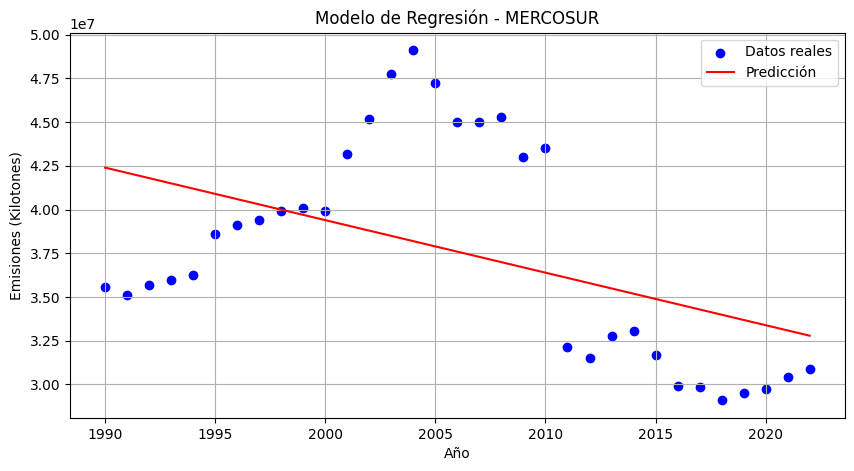

In [26]:
# Visualización del modelo MERCOSUR
plt.figure(figsize=(10, 5))
plt.scatter(X_mercosur, y_mercosur, label='Datos reales', color='blue')
plt.plot(X_mercosur, pred_mercosur, label='Predicción', color='red')
plt.title('Modelo de Regresión - MERCOSUR')
plt.xlabel('Año')
plt.ylabel('Emisiones (Kilotones)')
plt.legend()
plt.grid()
plt.show()

In [27]:
# Modelado predictivo: Regresión lineal para T-MEC
X_tmec = ds_t_mec_GEI['Año'].values.reshape(-1, 1)
y_tmec = ds_t_mec_GEI['Valor'].values
model.fit(X_tmec, y_tmec)
pred_tmec = model.predict(X_tmec)

In [28]:
# Evaluación del modelo T-MEC
r2_tmec = r2_score(y_tmec, pred_tmec)
mae_tmec = mean_absolute_error(y_tmec, pred_tmec)
rmse_tmec = mean_squared_error(y_tmec, pred_tmec, squared=False)

print("\nEvaluación del modelo T-MEC:")
print(f"R²: {r2_tmec:.2f}")
print(f"MAE: {mae_tmec:.2f}")
print(f"RMSE: {rmse_tmec:.2f}")


Evaluación del modelo T-MEC:
R²: 0.16
MAE: 2366442.67
RMSE: 2767386.52


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


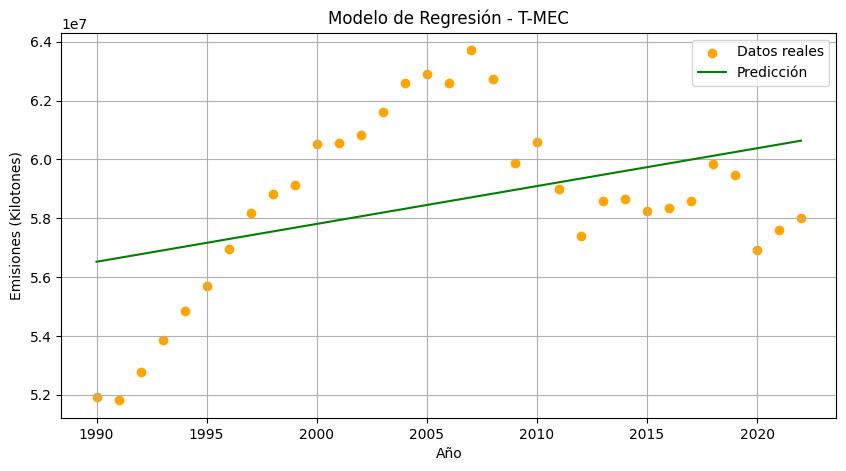

In [29]:
# Visualización del modelo T-MEC
plt.figure(figsize=(10, 5))
plt.scatter(X_tmec, y_tmec, label='Datos reales', color='orange')
plt.plot(X_tmec, pred_tmec, label='Predicción', color='green')
plt.title('Modelo de Regresión - T-MEC')
plt.xlabel('Año')
plt.ylabel('Emisiones (Kilotones)')
plt.legend()
plt.grid()
plt.show()

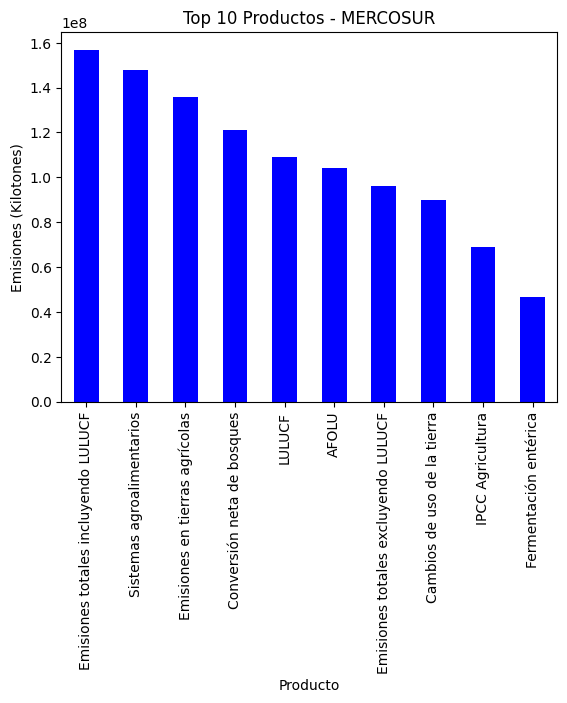

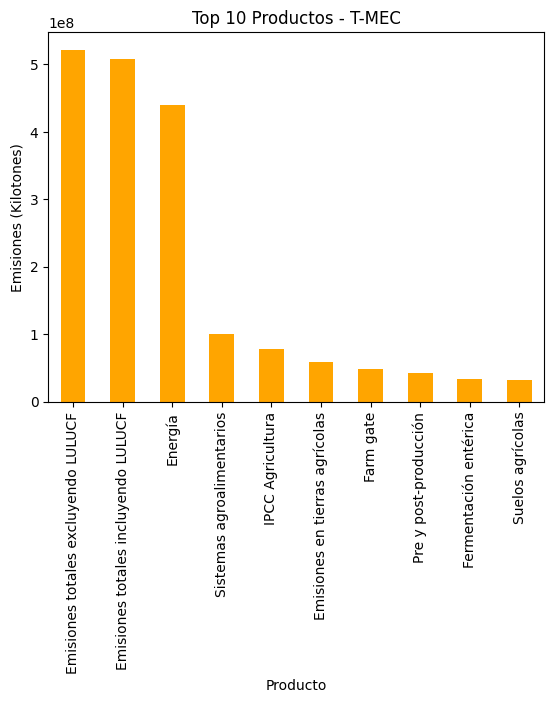

In [30]:
productos_mercosur = ds_mercosur.groupby('Producto')['Valor'].sum().sort_values(ascending=False).head(10)
productos_tmec = ds_t_mec.groupby('Producto')['Valor'].sum().sort_values(ascending=False).head(10)

# Visualizar los productos
productos_mercosur.plot(kind='bar', title='Top 10 Productos - MERCOSUR', color='blue')
plt.ylabel('Emisiones (Kilotones)')
plt.show()

productos_tmec.plot(kind='bar', title='Top 10 Productos - T-MEC', color='orange')
plt.ylabel('Emisiones (Kilotones)')
plt.show()


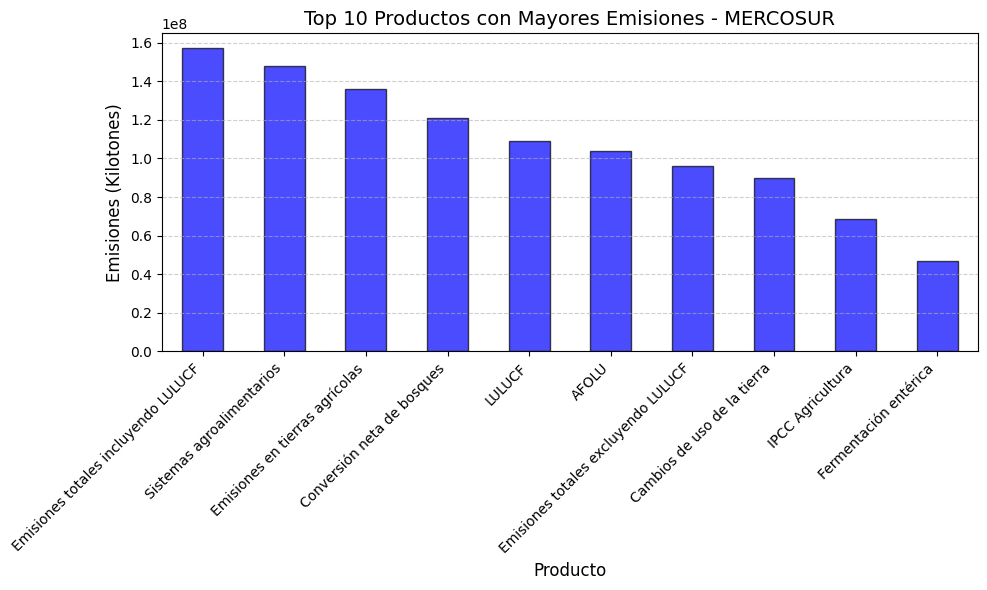

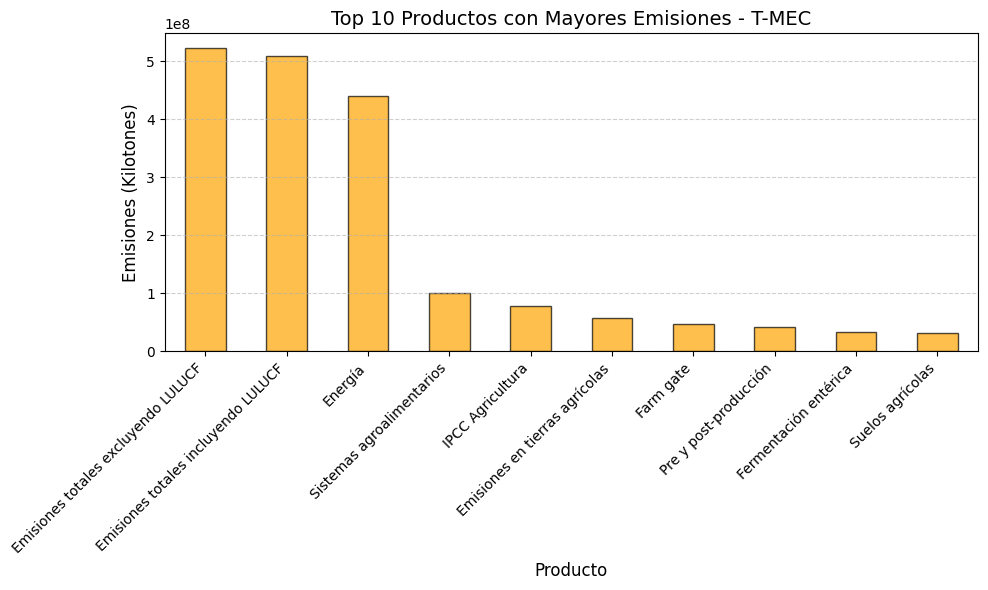

In [31]:
# Agrupa y suma las emisiones por producto para los bloques económicos
productos_mercosur = ds_mercosur.groupby('Producto')['Valor'].sum().sort_values(ascending=False).head(10)
productos_tmec = ds_t_mec.groupby('Producto')['Valor'].sum().sort_values(ascending=False).head(10)

# Visualizamos los productos del MERCOSUR
plt.figure(figsize=(10, 6))
productos_mercosur.plot(kind='bar', color='blue', alpha=0.7, edgecolor='black')
plt.title('Top 10 Productos con Mayores Emisiones - MERCOSUR', fontsize=14)
plt.xlabel('Producto', fontsize=12)
plt.ylabel('Emisiones (Kilotones)', fontsize=12)
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Visualizamos los productos del T-MEC
plt.figure(figsize=(10, 6))
productos_tmec.plot(kind='bar', color='orange', alpha=0.7, edgecolor='black')
plt.title('Top 10 Productos con Mayores Emisiones - T-MEC', fontsize=14)
plt.xlabel('Producto', fontsize=12)
plt.ylabel('Emisiones (Kilotones)', fontsize=12)
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [33]:
# Regresión Polinómica para MERCOSUR
degree = 3  # Cambia el grado según sea necesario
poly_model_mercosur = make_pipeline(PolynomialFeatures(degree), LinearRegression())

In [35]:
# Ajustar el modelo para MERCOSUR
X_mercosur = ds_mercosur_GEI['Año'].values.reshape(-1, 1)
y_mercosur = ds_mercosur_GEI['Valor'].values
poly_model_mercosur.fit(X_mercosur, y_mercosur)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [36]:
# Predicción para MERCOSUR
pred_mercosur_poly = poly_model_mercosur.predict(X_mercosur)

In [37]:
# Evaluación del modelo para MERCOSUR
r2_mercosur_poly = r2_score(y_mercosur, pred_mercosur_poly)
mae_mercosur_poly = mean_absolute_error(y_mercosur, pred_mercosur_poly)
rmse_mercosur_poly = mean_squared_error(y_mercosur, pred_mercosur_poly, squared=False)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [38]:
print("\nEvaluación del modelo polinómico MERCOSUR:")
print(f"R²: {r2_mercosur_poly:.2f}")
print(f"MAE: {mae_mercosur_poly:.2f}")
print(f"RMSE: {rmse_mercosur_poly:.2f}")


Evaluación del modelo polinómico MERCOSUR:
R²: 0.72
MAE: 2869923.51
RMSE: 3236291.31


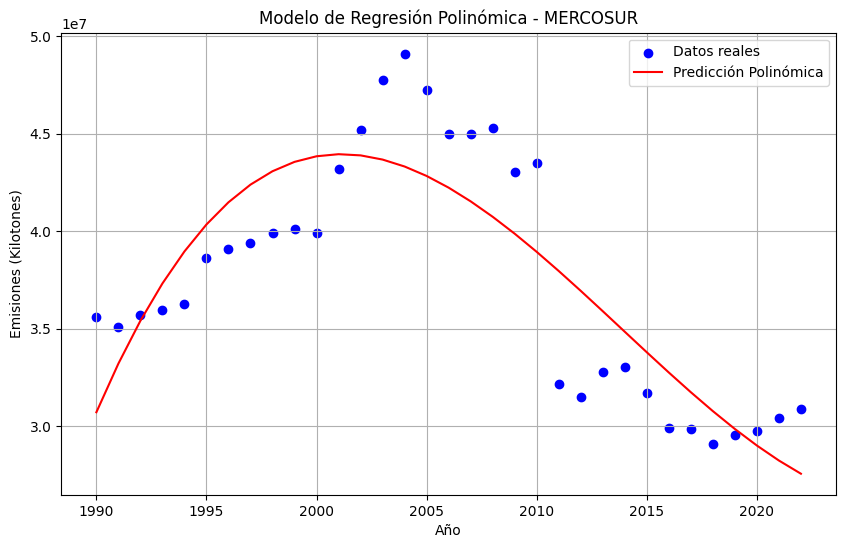

In [40]:
# Visualización del modelo para MERCOSUR
plt.figure(figsize=(10, 6))
plt.scatter(ds_mercosur_GEI['Año'], ds_mercosur_GEI['Valor'], label='Datos reales', color='blue')
plt.plot(ds_mercosur_GEI['Año'], pred_mercosur_poly, label='Predicción Polinómica', color='red')
plt.title('Modelo de Regresión Polinómica - MERCOSUR')
plt.xlabel('Año')
plt.ylabel('Emisiones (Kilotones)')
plt.legend()
plt.grid()
plt.show()

In [41]:
# Regresión Polinómica para T-MEC
poly_model_tmec = make_pipeline(PolynomialFeatures(degree), LinearRegression())

In [42]:
# Ajustar el modelo para T-MEC
X_tmec = ds_t_mec_GEI['Año'].values.reshape(-1, 1)
y_tmec = ds_t_mec_GEI['Valor'].values
poly_model_tmec.fit(X_tmec, y_tmec)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [43]:
# Predicción para T-MEC
pred_tmec_poly = poly_model_tmec.predict(X_tmec)

In [44]:
# Evaluación del modelo para T-MEC
r2_tmec_poly = r2_score(y_tmec, pred_tmec_poly)
mae_tmec_poly = mean_absolute_error(y_tmec, pred_tmec_poly)
rmse_tmec_poly = mean_squared_error(y_tmec, pred_tmec_poly, squared=False)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [45]:
print("\nEvaluación del modelo polinómico T-MEC:")
print(f"R²: {r2_tmec_poly:.2f}")
print(f"MAE: {mae_tmec_poly:.2f}")
print(f"RMSE: {rmse_tmec_poly:.2f}")


Evaluación del modelo polinómico T-MEC:
R²: 0.86
MAE: 908300.64
RMSE: 1138211.52


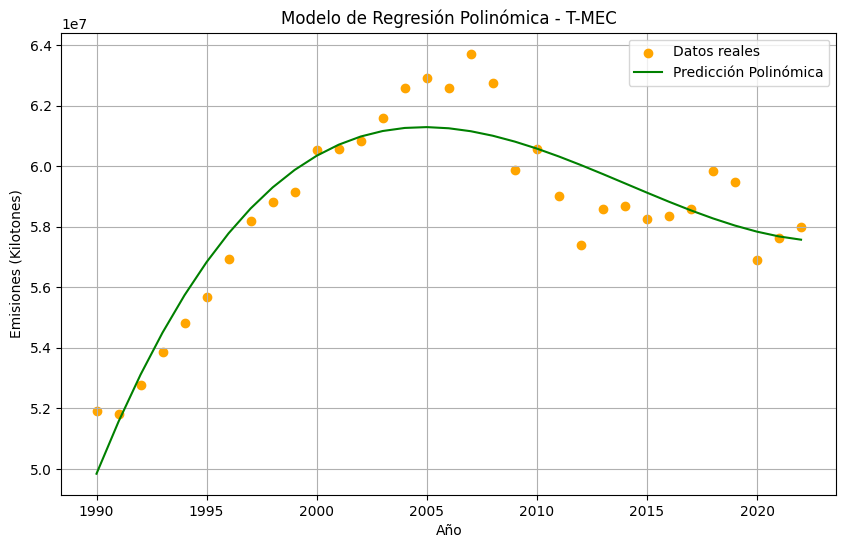

In [46]:
# Visualización del modelo para T-MEC
plt.figure(figsize=(10, 6))
plt.scatter(ds_t_mec_GEI['Año'], ds_t_mec_GEI['Valor'], label='Datos reales', color='orange')
plt.plot(ds_t_mec_GEI['Año'], pred_tmec_poly, label='Predicción Polinómica', color='green')
plt.title('Modelo de Regresión Polinómica - T-MEC')
plt.xlabel('Año')
plt.ylabel('Emisiones (Kilotones)')
plt.legend()
plt.grid()
plt.show()

In [47]:
import numpy as np
import matplotlib.pyplot as plt

In [48]:
# Generar años futuros para la predicción (2023-2030)
future_years = np.array(range(2023, 2031)).reshape(-1, 1)

In [49]:
# Predicciones futuras para MERCOSUR
future_predictions_mercosur = poly_model_mercosur.predict(future_years)

In [50]:
# Predicciones futuras para T-MEC
future_predictions_tmec = poly_model_tmec.predict(future_years)

In [51]:
# Visualización de tendencias históricas y futuras
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

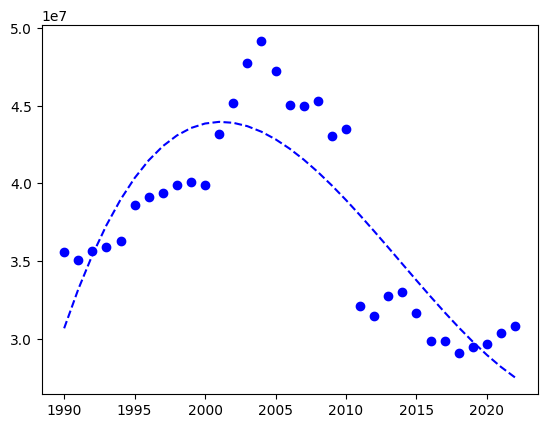

In [52]:
# Tendencias históricas MERCOSUR
plt.scatter(ds_mercosur_GEI['Año'], ds_mercosur_GEI['Valor'], label='Datos Históricos MERCOSUR', color='blue')
plt.plot(ds_mercosur_GEI['Año'], poly_model_mercosur.predict(ds_mercosur_GEI['Año'].values.reshape(-1, 1)), color='blue', linestyle='--', label='Tendencia MERCOSUR (Histórica)')

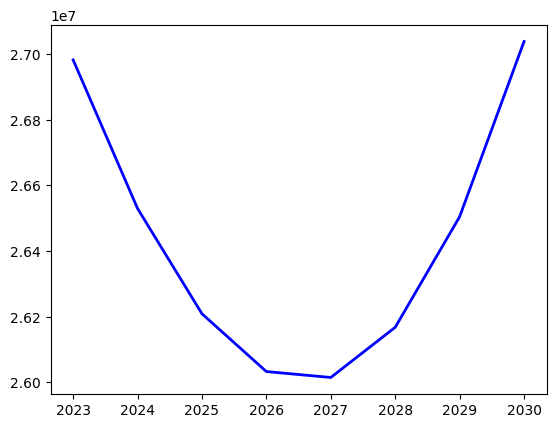

In [53]:
# Tendencias futuras MERCOSUR
plt.plot(future_years, future_predictions_mercosur, color='blue', label='Predicción MERCOSUR (Futuro)', linewidth=2)

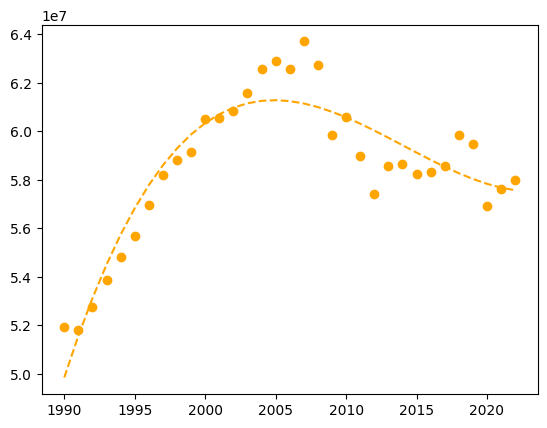

In [54]:
# Tendencias históricas T-MEC
plt.scatter(ds_t_mec_GEI['Año'], ds_t_mec_GEI['Valor'], label='Datos Históricos T-MEC', color='orange')
plt.plot(ds_t_mec_GEI['Año'], poly_model_tmec.predict(ds_t_mec_GEI['Año'].values.reshape(-1, 1)), color='orange', linestyle='--', label='Tendencia T-MEC (Histórica)')


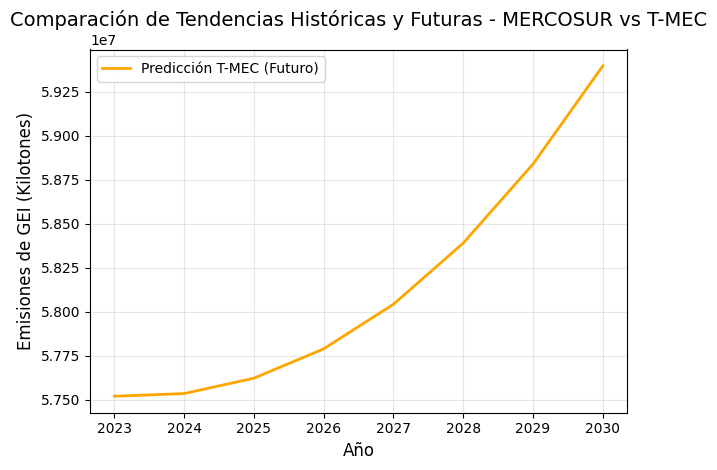

In [55]:
# Tendencias futuras T-MEC
plt.plot(future_years, future_predictions_tmec, color='orange', label='Predicción T-MEC (Futuro)', linewidth=2)

# Configuración del gráfico
plt.title('Comparación de Tendencias Históricas y Futuras - MERCOSUR vs T-MEC', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Emisiones de GEI (Kilotones)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()